In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Load the dataset
# We use pandas to read the CSV into a DataFrame (table format)
df=pd.read_csv("/Users/macbook/Loan-Prediction-Project/data/loan_prediction.csv")
print(df.head())

   age  gender marital_status education_level  annual_income  monthly_income  \
0   59    Male        Married        Master's       24240.19         2020.02   
1   72  Female        Married      Bachelor's       20172.98         1681.08   
2   49  Female         Single     High School       26181.80         2181.82   
3   35  Female         Single     High School       11873.84          989.49   
4   63   Other         Single           Other       25326.44         2110.54   

  employment_status  debt_to_income_ratio  credit_score  loan_amount  ...  \
0          Employed                 0.074           743     17173.72  ...   
1          Employed                 0.219           531     22663.89  ...   
2          Employed                 0.234           779      3631.36  ...   
3          Employed                 0.264           809     14939.23  ...   
4          Employed                 0.260           663     16551.71  ...   

  loan_term  installment  grade_subgrade  num_of_open_ac

/var/folders/c9/l113qtyn19x8sdr78sd6wwp00000gn/T/ipykernel_71784/2143697925.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_paid_back', data=df, palette='coolwarm')


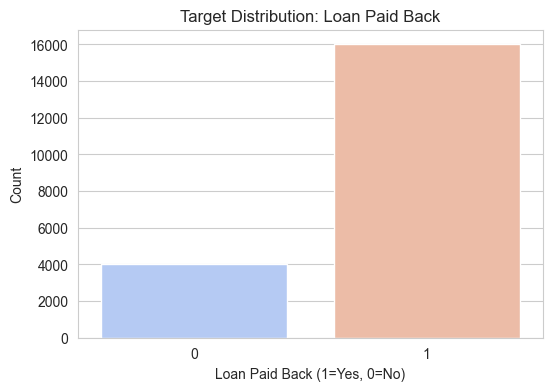

1    79.99
0    20.01
Name: loan_paid_back, dtype: float64


In [ ]:
#Step 1: Setup and Target Variable Check
# 1-->. Visualize the Target Variable: 'loan_paid_back'
# 1 = Loan Paid, 0 = Default (presumably)
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_paid_back', data=df, palette='coolwarm')
plt.title('Target Distribution: Loan Paid Back')
plt.xlabel('Loan Paid Back (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# Print exact percentages
print(df['loan_paid_back'].value_counts(normalize=True) * 100)

soo according to the data we get to know that 80 percent people paid the loan back but the 20 percent dont

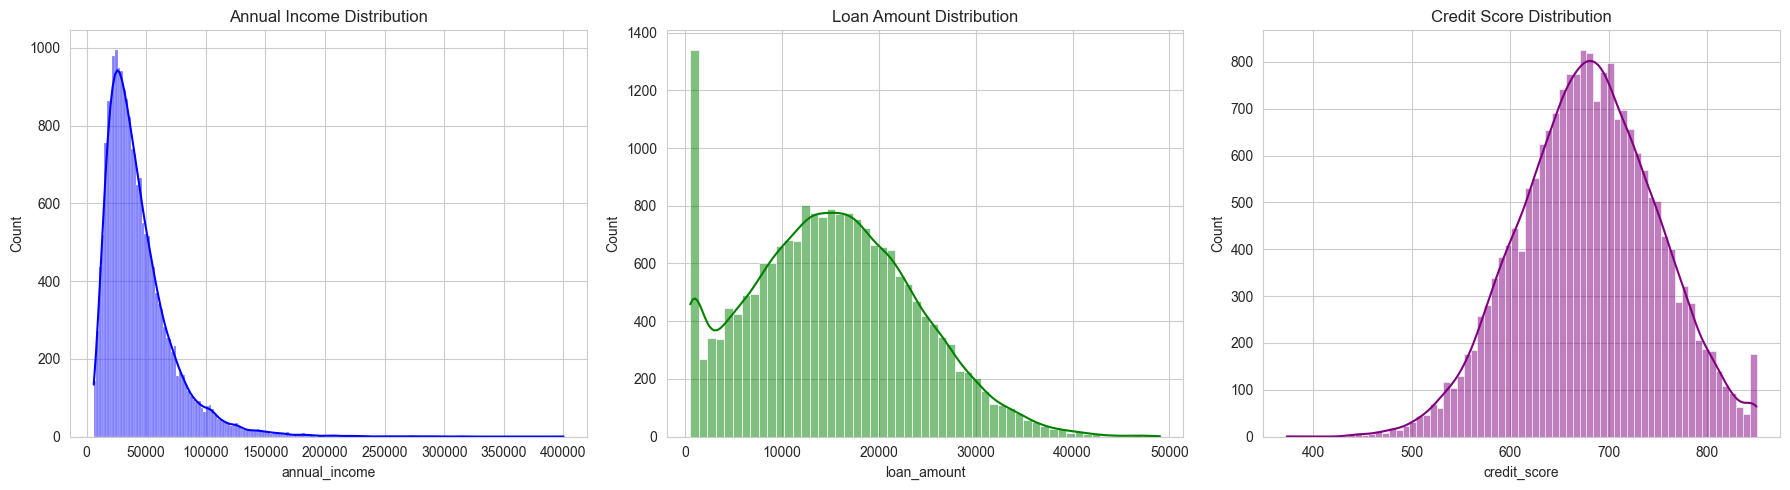

In [9]:
#Step 2: Numerical Variable Analysis
#Let's look at annual_income, loan_amount, and credit_score
# 2. Distribution of Key Numerical Features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Annual Income
sns.histplot(df['annual_income'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Annual Income Distribution')

# Loan Amount
sns.histplot(df['loan_amount'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Loan Amount Distribution')

# Credit Score
sns.histplot(df['credit_score'], kde=True, ax=axes[2], color='purple')
axes[2].set_title('Credit Score Distribution')

plt.tight_layout()
plt.show()

From the above EDA we get to know the about the annual income ,credit score ,and loan amount of the individual 
which helps us to get the real insights of the data 

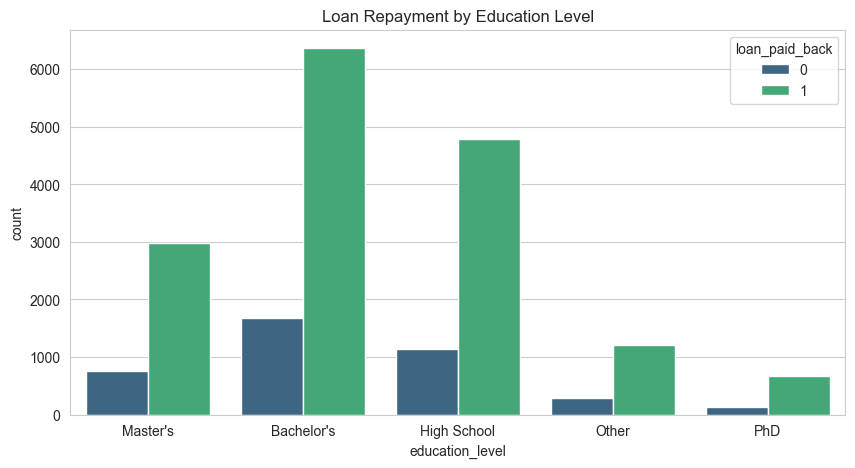

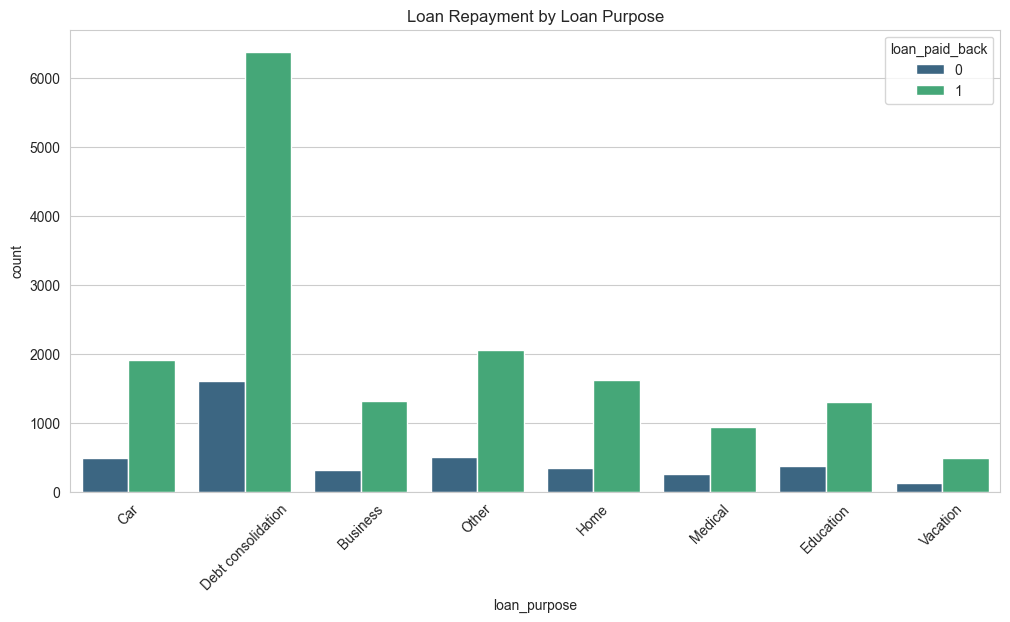

In [12]:
#Step 3: Categorical vs. Target Analysis
#Lets see if things like education_level or loan_purpose affect repayment.
# 3. Does Education affect repayment?
plt.figure(figsize=(10,5))
sns.countplot(x='education_level', hue='loan_paid_back', data=df, palette='viridis')
plt.title('Loan Repayment by Education Level')
plt.show()
#4  . Does Loan Purpose affect repayment?
plt.figure(figsize=(12,6))
sns.countplot(x='loan_purpose', hue='loan_paid_back', data=df, palette='viridis')
plt.title('Loan Repayment by Loan Purpose')
plt.xticks(rotation=45)
plt.show()


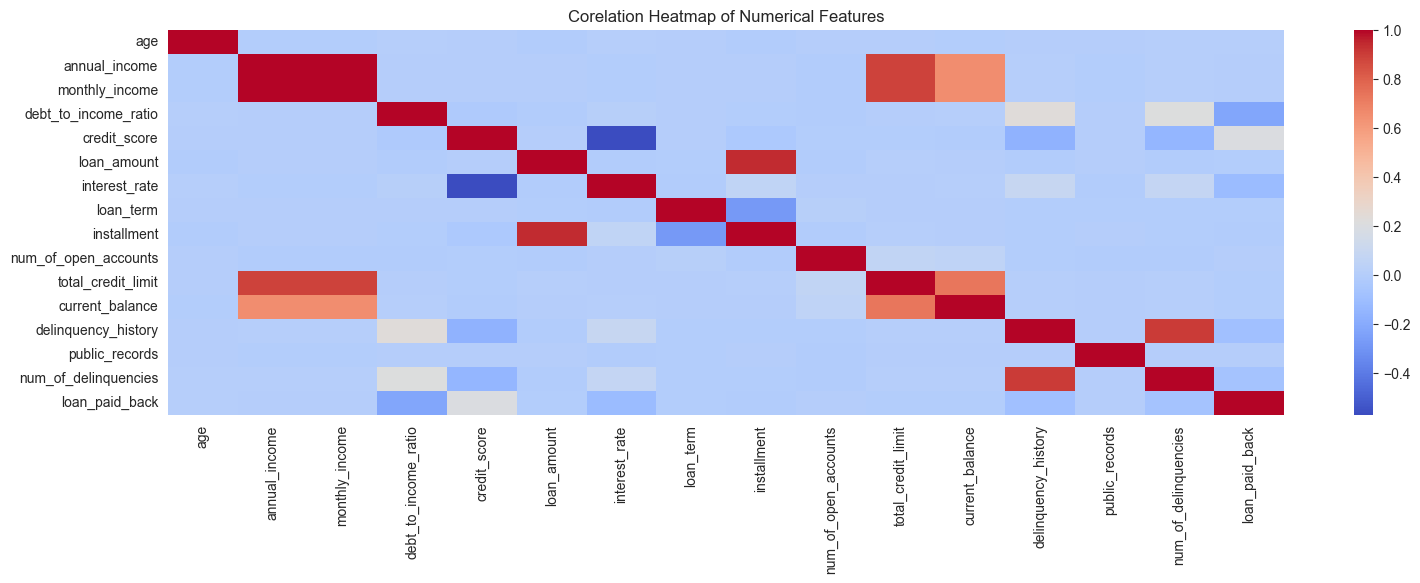

Correlation with Target:

loan_paid_back          1.000000
credit_score            0.199841
age                     0.007999
public_records          0.003210
monthly_income          0.003057
annual_income           0.003057
num_of_open_accounts    0.002964
loan_amount            -0.002490
loan_term              -0.002615
total_credit_limit     -0.002985
current_balance        -0.004749
installment            -0.010068
num_of_delinquencies   -0.070896
delinquency_history    -0.084940
interest_rate          -0.110935
debt_to_income_ratio   -0.223831
Name: loan_paid_back, dtype: float64


In [ ]:
#Step 4: Correlation Heatmap
# 5. Correlation Heatmap
# Select ONLY numeric columns to avoid the "could not convert string to float" error
numeric_df=df.select_dtypes(include=['number'])
plt.figure(figsize=(18,5))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Corelation Heatmap of Numerical Features')
plt.show()
# Let's check specifically what correlates with 'loan_paid_back'
print("Correlation with Target:\n")
print(numeric_df.corr()['loan_paid_back'].sort_values(ascending=False))

##Feature Engineering

In [15]:
#Now we will fix the skewed income data 
# Log Transformation
# We apply log to 'annual_income' to normalize the distribution.
df['annual_income_log']=np.log(df['annual_income'])
#  we will also Drop the original skewed column to avoid duplication
df.drop('annual_income',axis=1,inplace=True)
print("Log transformation applied to 'annual_income'.")

Log transformation applied to 'annual_income'.


In [16]:
#Encode Categorical Variables
# Convert text columns to numbers
le=LabelEncoder()
cols_to_encode=['gender','marital_status','education_level','loan_purpose','employment_status','grade_subgrade']
for col in cols_to_encode:
    df[col]=le.fit_transform(df[col])
print("Encoding complete. Data is now numeric")


Encoding complete. Data is now numeric


In [17]:
#Split Data into Train and Test
# Separate Features (X) and Target (y)
X=df.drop('loan_paid_back',axis=1)
y=df['loan_paid_back']
# Split into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Split Complete.")


Data Split Complete.


In [19]:
#Step 5: Train Model
# Scale the data so Income and DebtRatio are on the same scale
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
# Train Logistic Regression Model
model=LogisticRegression(max_iter=1000)
model.fit(X_train_scaled,y_train)
print("Model Training Completed succesfully!.")



Model Training Completed succesfully!.


In [21]:
#Step 6: Evaluation
# Predict on Test Set
y_pred=model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8835

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.55      0.66       818
           1       0.89      0.97      0.93      3182

    accuracy                           0.88      4000
   macro avg       0.86      0.76      0.79      4000
weighted avg       0.88      0.88      0.87      4000



In [22]:
# Check the baseline
df['loan_paid_back'].value_counts(normalize=True)

1    0.7999
0    0.2001
Name: loan_paid_back, dtype: float64

In [23]:
# Cell 7
# Save the model and the scaler (we need the scaler to process new user input!)
import joblib
import pickle
with open('../model.pkl', 'wb') as f:
    pickle.dump(model, f)
    
with open('../scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and Scaler saved to project root folder!")

Model and Scaler saved to project root folder!
